In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray();
from matplotlib.pyplot import imshow


import skimage
from skimage.io import imread, imsave
#call color Lib.
from skimage.color import rgb2gray, rgb2xyz, rgb2hsv, rgb2lab, rgb2yuv, rgb2ycbcr, rgb2ypbpr, ycbcr2rgb, rgb2rgbcie
from skimage.transform import resize

import cv2

import numpy as np


from ipywidgets import interact, interactive, fixed, RadioButtons
import ipywidgets as widgets
from IPython.display import display

<Figure size 640x480 with 0 Axes>

In [ ]:
import scipy.misc
import scipy.ndimage
from PIL import Image
from skimage import io, data
from matplotlib import pyplot as plt


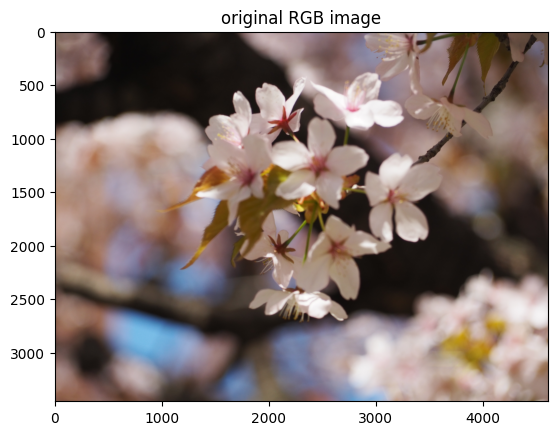

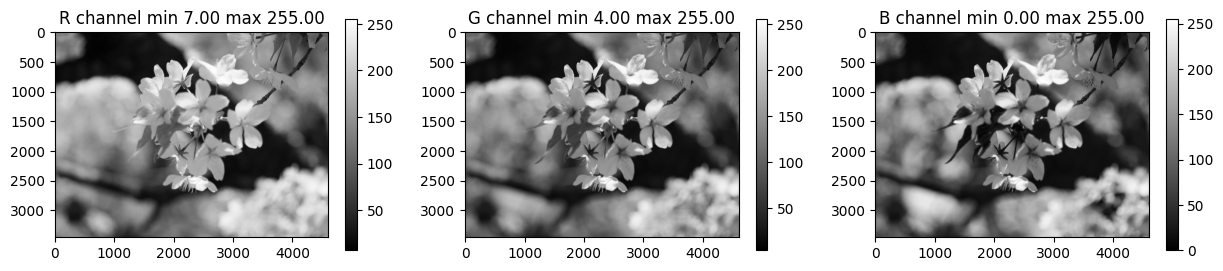

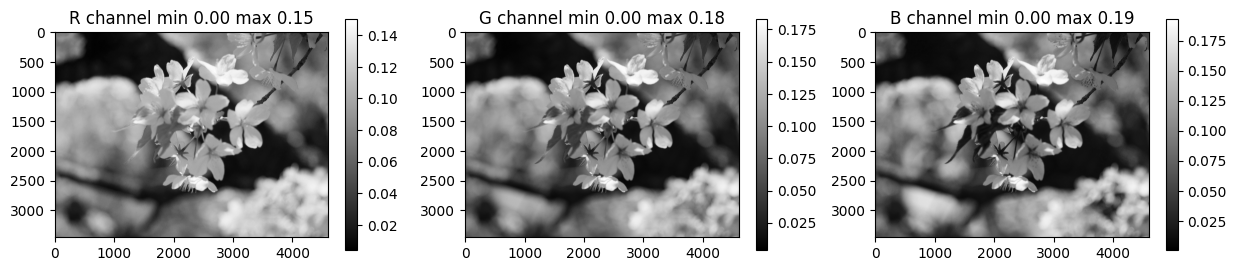

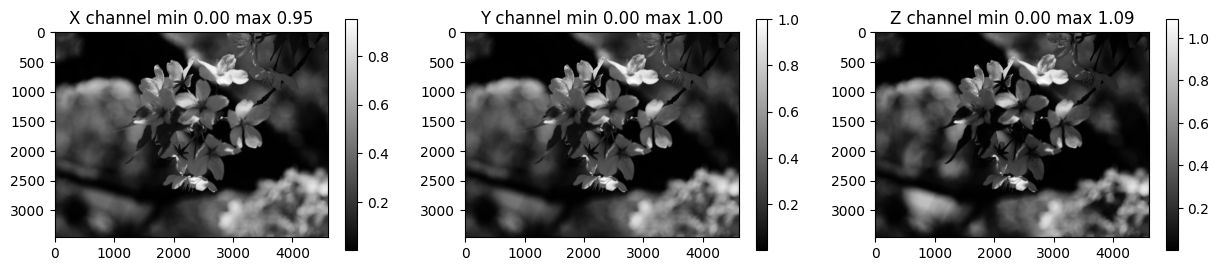

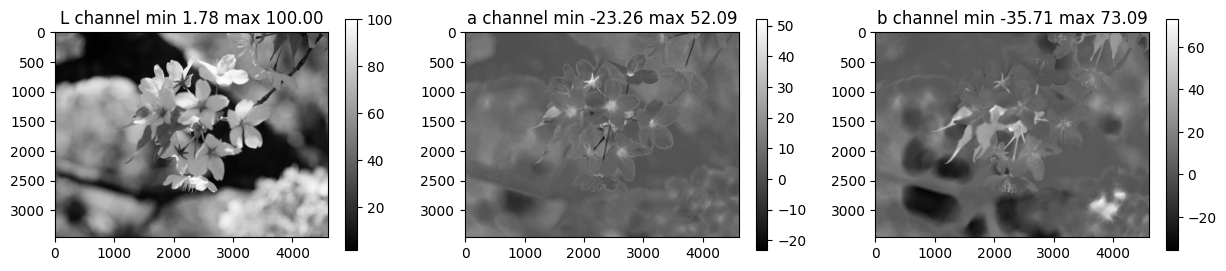

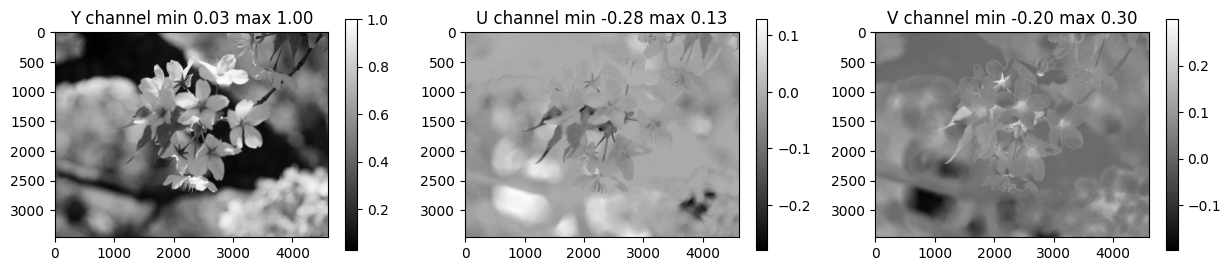

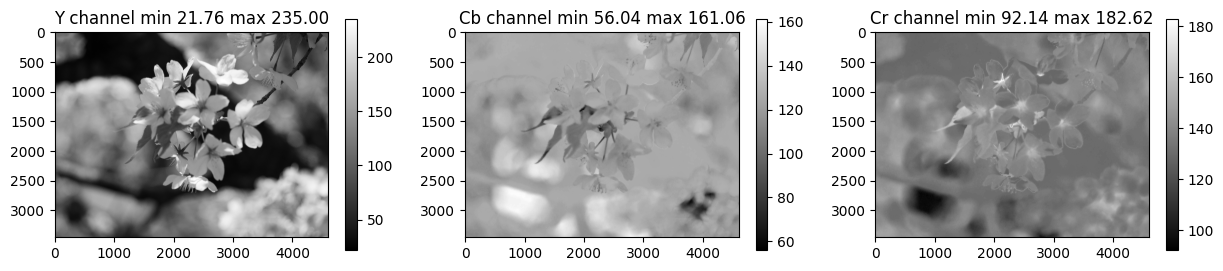

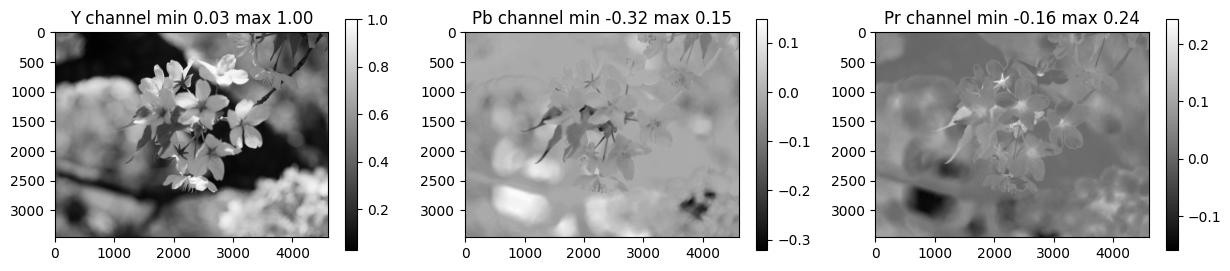

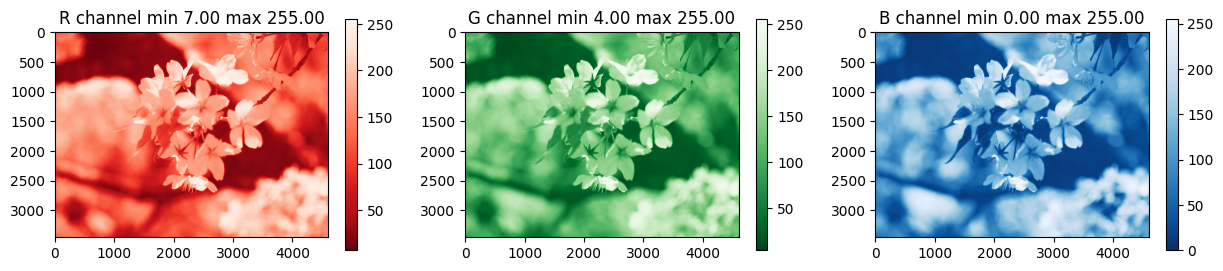

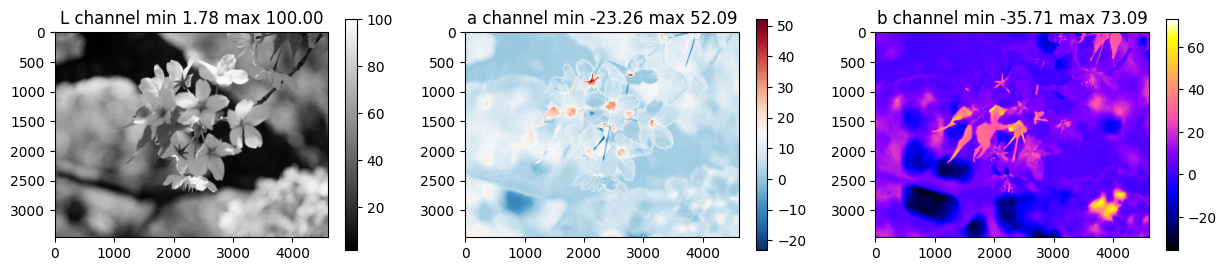

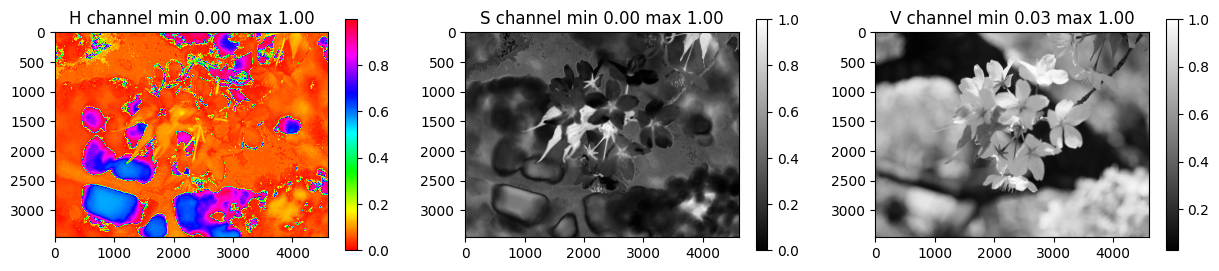

In [ ]:
def plot_rgb2(im, rgb2xxx, tospace_str, cmap=['gray', 'gray', 'gray']):
    xxx = rgb2xxx(im) if rgb2xxx is not None else im

    fig = plt.figure(figsize=(15,3))

    for i, c in zip(range(3), tospace_str):
        ax = fig.add_subplot(1, 3, i + 1)
        imshow(xxx[:, :, i], cmap=cmap[i])
        plt.colorbar()
        plt.title('{0} channel min {1:.2f} max {2:.2f}'.format(c, xxx[:, :, i].min(), xxx[:, :, i].max() ))

    plt.show();



im = imread('/content/drive/MyDrive/images/sakura.JPG')

imshow(im)
plt.title("original RGB image")
plt.show()

plot_rgb2(im, None, 'RGB')
plot_rgb2(im, rgb2rgbcie, 'RGB')
plot_rgb2(im, rgb2xyz, 'XYZ')
plot_rgb2(im, rgb2lab, 'Lab')
plot_rgb2(im, rgb2yuv, 'YUV')
plot_rgb2(im, rgb2ycbcr, ['Y', 'Cb', 'Cr'])
plot_rgb2(im, rgb2ypbpr, ['Y', 'Pb', 'Pr'])


plot_rgb2(im, None, 'RGB', ['Reds_r', 'Greens_r', 'Blues_r'])
plot_rgb2(im, rgb2lab, 'Lab', ['gray', 'RdBu_r', 'gnuplot2'])
plot_rgb2(im, rgb2hsv, 'HSV', ['hsv', 'gray', 'gray'])

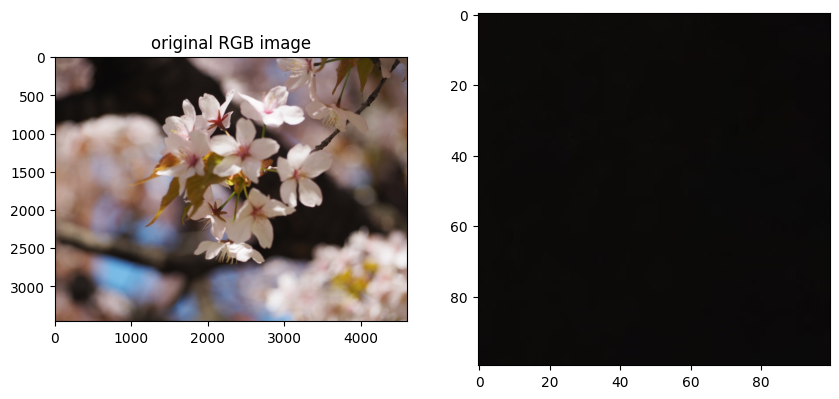

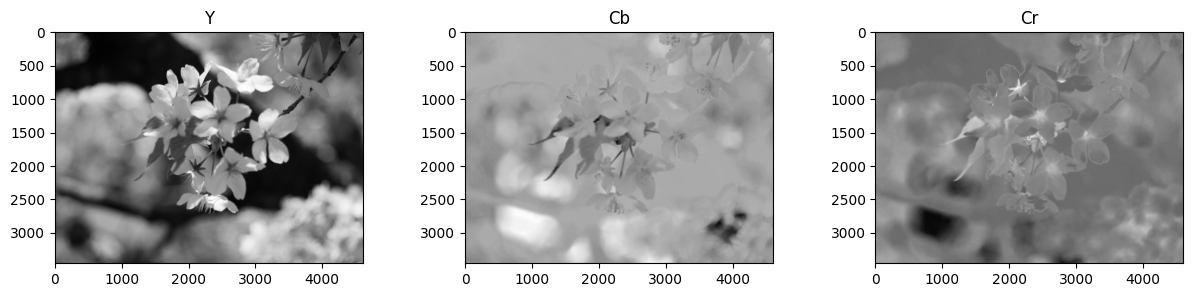

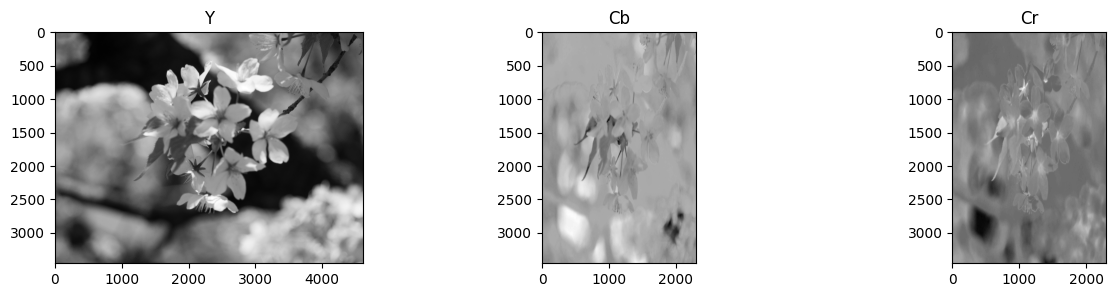

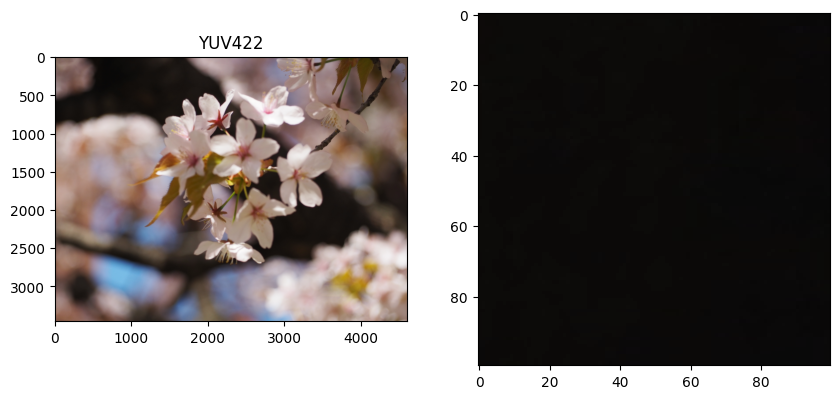

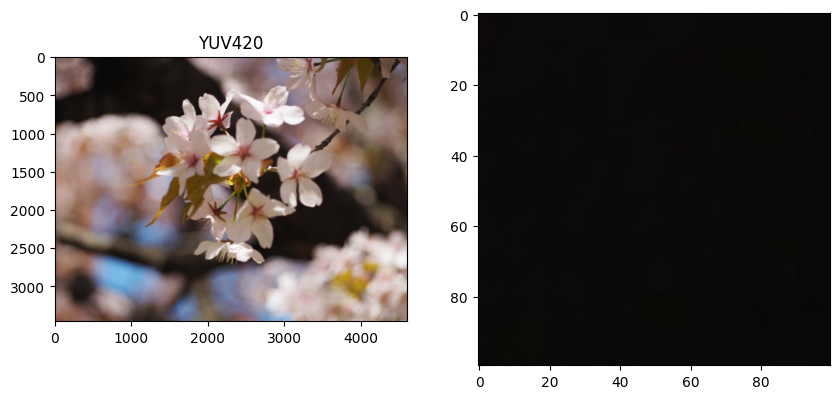

In [ ]:
im = imread('/content/drive/MyDrive/images/sakura.JPG')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 2, 1)
imshow(im)
plt.title("original RGB image")
ax = fig.add_subplot(1, 2, 2)
imshow(im[300:400, 550:650])
plt.show()




ycbcr = rgb2ycbcr(im)
h, w, _ = ycbcr.shape

#####

Y = ycbcr[:, :, 0]
Cb = ycbcr[:, :, 1]
Cr = ycbcr[:, :, 2]

fig = plt.figure(figsize=(15,3))

ax = fig.add_subplot(1, 3, 1)
imshow(Y)
plt.title('Y')

ax = fig.add_subplot(1, 3, 2)
imshow(Cb)
plt.title('Cb')

ax = fig.add_subplot(1, 3, 3)
imshow(Cr)
plt.title('Cr')

plt.show();


YUV444 = (ycbcr2rgb(ycbcr) * 255).astype(np.uint8)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 2, 1)
imshow(YUV444)
plt.title("YUV444")
ax = fig.add_subplot(1, 2, 2)
imshow(YUV444[300:400, 550:650])
plt.show()


#####

Y = ycbcr[:, :, 0]
Cb = resize(ycbcr[:, :, 1], (h, w//2))
Cr = resize(ycbcr[:, :, 2], (h, w//2))

fig = plt.figure(figsize=(15,3))

ax = fig.add_subplot(1, 3, 1)
imshow(Y)
plt.title('Y')

ax = fig.add_subplot(1, 3, 2)
imshow(Cb)
plt.title('Cb')

ax = fig.add_subplot(1, 3, 3)
imshow(Cr)
plt.title('Cr')

plt.show();

ycbcr[:, :, 1] = resize(Cb, (h, w))
ycbcr[:, :, 2] = resize(Cr, (h, w))

YUV422 = (ycbcr2rgb(ycbcr) * 255).astype(np.uint8)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 2, 1)
imshow(YUV422)
plt.title("YUV422")
ax = fig.add_subplot(1, 2, 2)
imshow(YUV422[300:400, 550:650])
plt.show()


#####

Y = ycbcr[:, :, 0]
Cb = resize(ycbcr[:, :, 1], (h//2, w//2))
Cr = resize(ycbcr[:, :, 2], (h//2, w//2))

fig = plt.figure(figsize=(15,3))

ax = fig.add_subplot(1, 3, 1)
imshow(Y)
plt.title('Y')

ax = fig.add_subplot(1, 3, 2)
imshow(Cb)
plt.title('Cb')

ax = fig.add_subplot(1, 3, 3)
imshow(Cr)
plt.title('Cr')

plt.show();

ycbcr[:, :, 1] = resize(Cb, (h, w))
ycbcr[:, :, 2] = resize(Cr, (h, w))

YUV420 = (ycbcr2rgb(ycbcr) * 255).astype(np.uint8)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 2, 1)
imshow(YUV420)
plt.title("YUV420")
ax = fig.add_subplot(1, 2, 2)
imshow(YUV420[300:400, 550:650])
plt.show()


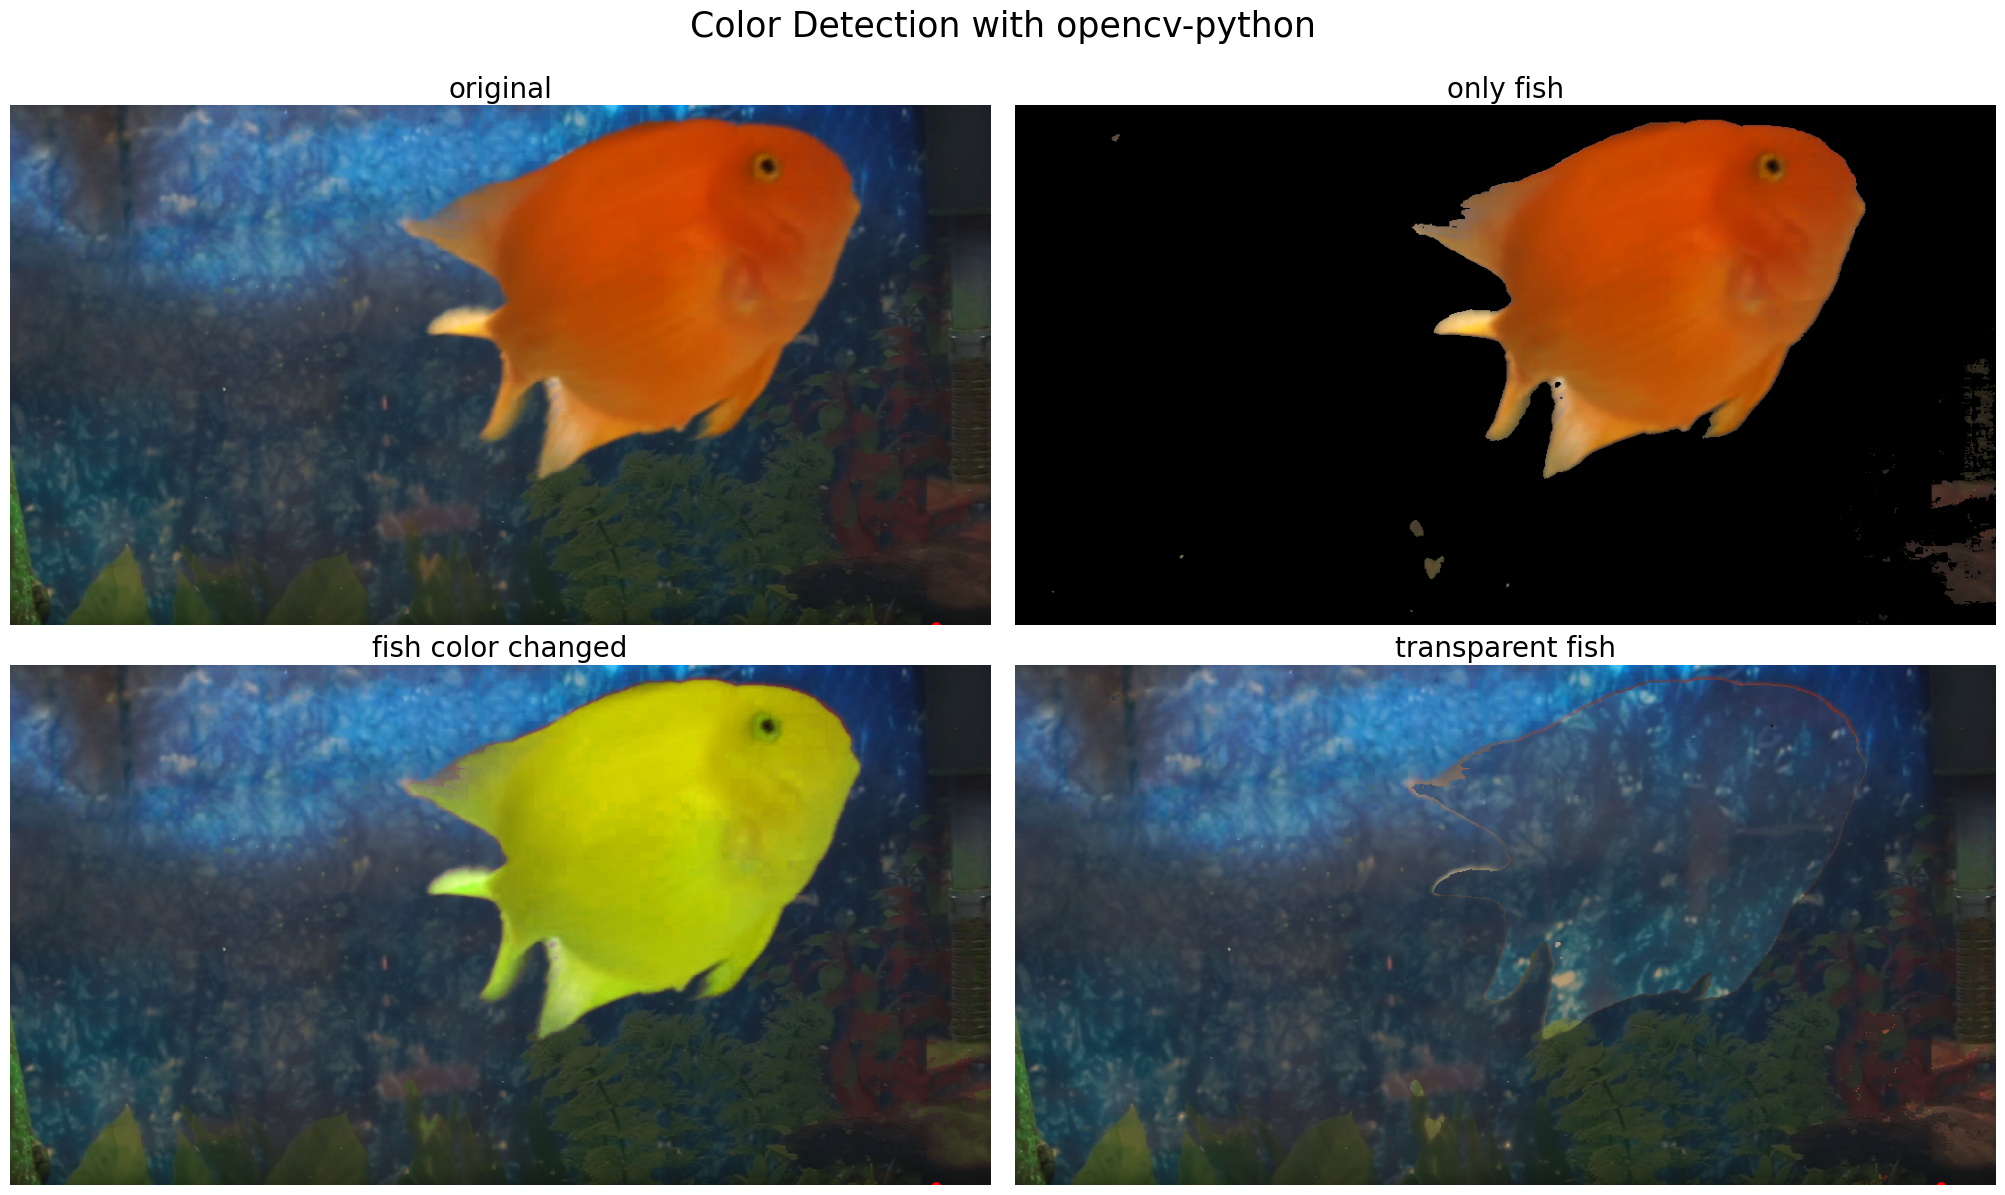

In [ ]:
bck = cv2.imread("/content/drive/MyDrive/images/fish_bg.png")
img = cv2.imread("/content/drive/MyDrive/images/fish.png")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, (5, 75, 25), (25, 255, 255))

## slice the orange fish
imask = mask>0
orange = np.zeros_like(img, np.uint8)
orange[imask] = img[imask]

yellow = img.copy()
hsv[...,0] = hsv[...,0] + 20
yellow[imask] = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)[imask]
yellow = np.clip(yellow, 0, 255)

bckfish = cv2.bitwise_and(bck,bck, mask=imask.astype(np.uint8))
nofish = img.copy()
nofish = cv2.bitwise_and(nofish,nofish, mask=(np.bitwise_not(imask)).astype(np.uint8))
nofish = nofish + bckfish

plt.figure(figsize=(20,12))
plt.subplots_adjust(0,0,1,0.9,0.01,0.075)
plt.subplot(221), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('original', size=20)
plt.subplot(222), plt.imshow(cv2.cvtColor(orange, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('only fish', size=20)
plt.subplot(223), plt.imshow(cv2.cvtColor(yellow, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('fish color changed', size=20)
plt.subplot(224), plt.imshow(cv2.cvtColor(nofish, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('transparent fish', size=20)
plt.suptitle('Color Detection with opencv-python', size=25)
plt.show()

จากโมเดลสีรูปแบบข้างต้นให้นักศึกษาเขียนโปรแกรม เพื่อแสดงพื้นที่สีแดงบนในหน้าดังแนบ
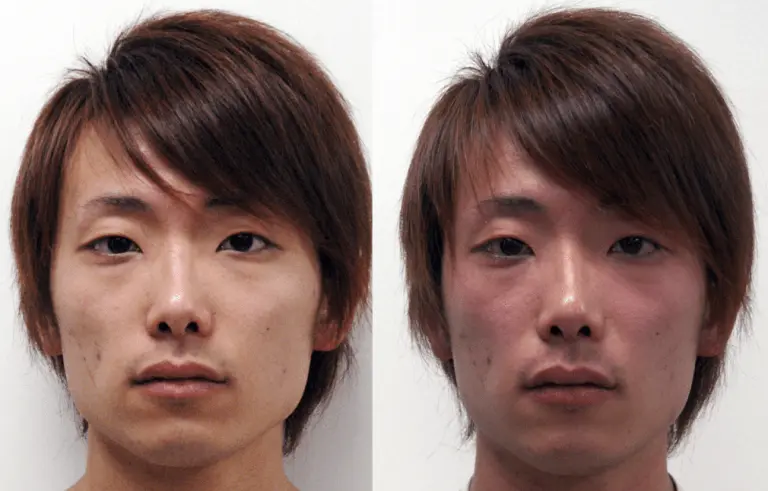

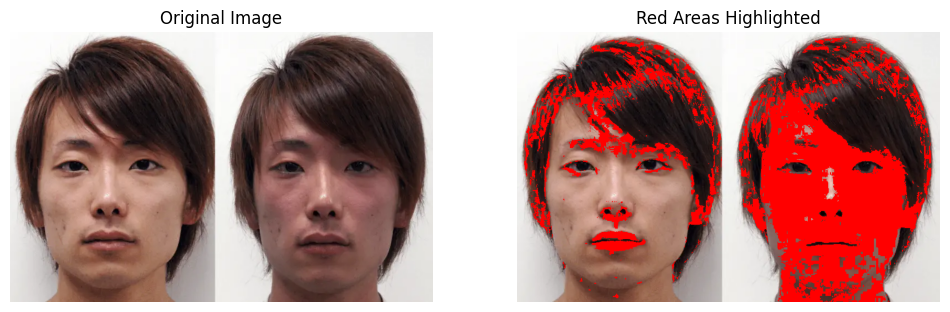

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the uploaded image
image_path = '/content/drive/MyDrive/images/download.png'
img = cv2.imread(image_path)

# Check if the image was loaded successfully
if img is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds for red color in HSV
    lower_red1 = np.array([0, 75, 50])  # Lower bound for red (hue 0-10)
    upper_red1 = np.array([5, 255, 255])  # Upper bound for red (hue 0-10)
    lower_red2 = np.array([170, 70, 50])  # Lower bound for red (hue 170-180)
    upper_red2 = np.array([180, 255, 255])  # Upper bound for red (hue 170-180)

    # Create masks for the two red ranges
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

    # Combine the masks to get the overall red mask
    mask = mask1 + mask2

    # Create a copy of the image to modify
    colored_img = img.copy()

    # Set the color for the red areas to red
    colored_img[mask > 0] = [0, 0, 255]  # Red color in BGR

    # Display the original and processed images side by side using matplotlib
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(colored_img, cv2.COLOR_BGR2RGB))
    plt.title("Red Areas Highlighted")
    plt.axis("off")

    plt.show()
